In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from statsmodels.tsa import stattools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.ar_model import AutoReg
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
#FTemperature reecordings of Berlin area that was taken from official website www.ecad.eu 
df =  pd.read_csv('ECA_blended_custom/TG_STAID002759.txt', sep = ",", header = 14)

In [3]:
df1 = df.drop(columns = ' SOUID') 

In [4]:
df1['    DATE'] = pd.to_datetime(df1['    DATE'], format = '%Y%m%d')


In [5]:
df1.columns=['date','temperature','quality']

In [6]:
df1.set_index('date', inplace = True, drop = True)

In [7]:
df1['temperature'] = df1['temperature'] /10

In [8]:
#I created year so I could see some changes in the output. But it was same
df1['year']= df1.index.year

In [9]:
temp= df1[df1['quality']==0]

In [10]:
#temp=temp1.iloc[27000:]

In [11]:
temp['timestep'] = range(len(temp))

/tmp/ipykernel_14752/1154500157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['timestep'] = range(len(temp))


In [12]:
seasonal_dummies = pd.get_dummies(temp.index.month, prefix='month', drop_first=True).set_index(temp.index)
temp = temp.join(seasonal_dummies)

In [13]:
temp

,temperature,quality,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,
1876-01-01,2.2,0,1876,0,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,0,1876,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,0,1876,2,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,0,1876,3,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,0,1876,4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,1.6,0,2023,53522,0,0,0,0,0,0,0,0,0,0,0
2023-01-28,0.1,0,2023,53523,0,0,0,0,0,0,0,0,0,0,0
2023-01-29,1.1,0,2023,53524,0,0,0,0,0,0,0,0,0,0,0


In [14]:
X = temp.drop(['temperature'], axis=1)
y = temp['temperature']

In [15]:
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [16]:
temp['trend_seasonal'] = m.predict(X)

In [17]:
temp['differences'] = temp['temperature'] - temp['trend_seasonal']

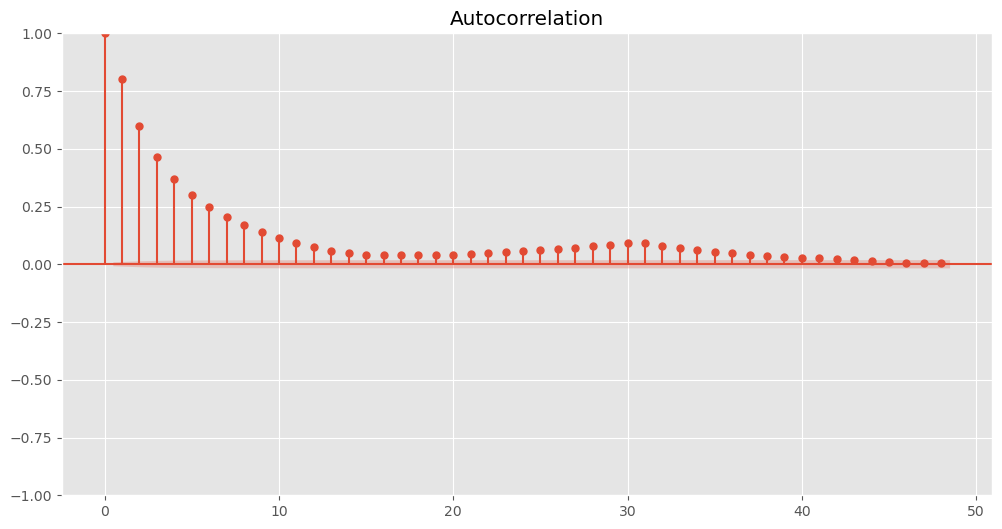

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(temp['differences']);

In [ ]:
#finding the number of lags to do
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(temp['differences'], maxlag=12)
selected_order.ar_lags

/home/priya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/priya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[1, 2, 3, 4]

In [ ]:
selected_order.aic


{(1, 2, 3, 4, 5): 241420.9059719923,
 (1, 2, 3, 4, 5, 6, 7): 241421.190788387,
 (1, 2, 3, 4, 5, 6): 241421.51051670802,
 (1, 2, 3, 4, 5, 6, 7, 8): 241421.70866972895,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 241423.43249044786,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 241425.349160473,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 241426.9563464736,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 241428.9345268539,
 (1, 2, 3, 4): 241429.65981970314,
 (1, 2, 3): 241441.95083689262,
 (1, 2): 241704.07184440934,
 (1,): 242664.79825461787,
 0: 298303.0067393775}

In [ ]:
selected_order.aic

{(1, 2, 3, 4, 5): 241420.9059719923,
 (1, 2, 3, 4, 5, 6, 7): 241421.190788387,
 (1, 2, 3, 4, 5, 6): 241421.51051670802,
 (1, 2, 3, 4, 5, 6, 7, 8): 241421.70866972895,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 241423.43249044786,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 241425.349160473,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 241426.9563464736,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 241428.9345268539,
 (1, 2, 3, 4): 241429.65981970314,
 (1, 2, 3): 241441.95083689262,
 (1, 2): 241704.07184440934,
 (1,): 242664.79825461787,
 0: 298303.0067393775}

In [ ]:
ar_model = AutoReg(endog=temp['differences'], lags=4, trend="n").fit()

/home/priya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:            differences   No. Observations:                53523
Model:                     AutoReg(4)   Log Likelihood             -120726.615
Method:               Conditional MLE   S.D. of innovations              2.309
Date:                Thu, 06 Apr 2023   AIC                         241463.230
Time:                        17:01:31   BIC                         241507.669
Sample:                             4   HQIC                        241477.106
                                53523                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
differences.L1     0.9197      0.004    212.788      0.000       0.911       0.928
differences.L2    -0.1943      0.006    -33.116      0.000      -0.206      -0.183
differences.L3     0.0551      0.006      9.395      0.000       0.044       0.067
differences.L4     0.0164      0.004      3.791      0.000       0.008       0.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2577           -0.0000j            1.2577           -0.0000
AR.2            1.0066           -2.5100j            2.7043           -0.1893
AR.3            1.0066           +2.5100j            2.7043            0.1893
AR.4           -6.6353           -0.0000j            6.6353           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
ar_model.forecast(steps=3) #The ar model doesn't work. It doesn't predict so well.

/home/priya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/priya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


53523    2.529214
53524    1.833437
53525    1.426760
dtype: float64

<Axes: xlabel='date', ylabel='differences'>

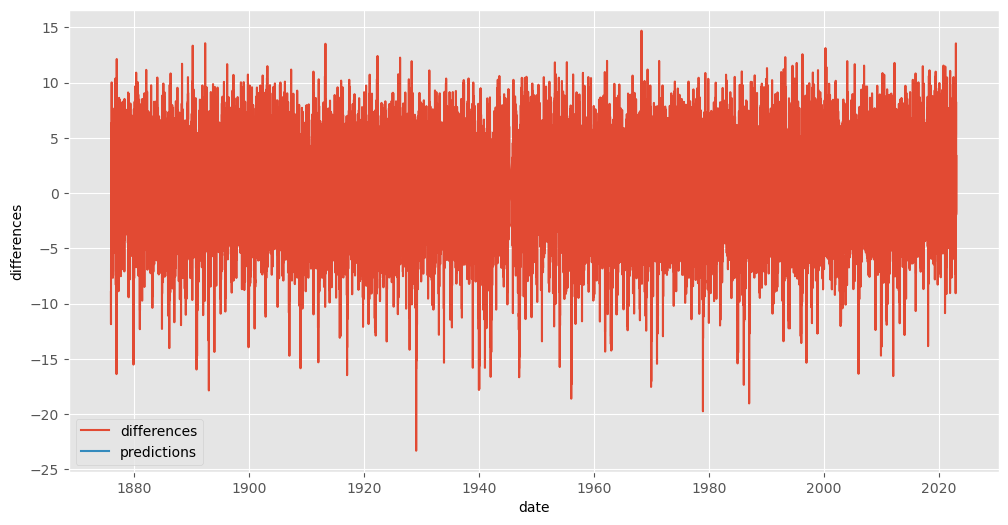

In [ ]:
import seaborn as sns
sns.lineplot(data=temp['differences'],label = 'differences')
sns.lineplot(data=ar_model.predict(),label = 'predictions') # this work only when I reduced the data like from iloc =30000:

In [ ]:
temp['lag1'] = temp['differences'].shift(1)

In [ ]:
temp['lag2'] = temp['differences'].shift(2)

In [ ]:
temp['lag3'] = temp['differences'].shift(3)

In [ ]:
temp['lag4'] = temp['differences'].shift(4)

In [ ]:
temp.dropna(inplace=True)
X_full = temp.drop(['temperature', 'trend_seasonal', 'differences'], axis=1)
y_full = temp['temperature']

In [ ]:
m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression()

In [ ]:

ts_split = TimeSeriesSplit(n_splits=5)

In [ ]:
# See how the folds work: 
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    print(f'The training data for the {i+1}th iteration are the observations {train_index[0]} to {train_index[-1]}')
    print(f'The validation data for the {i+1}th iteration are the observations {validation_index[0]} to {validation_index[-1]}')
    print()

The training data for the 1th iteration are the observations 0 to 8922
The validation data for the 1th iteration are the observations 8923 to 17842

The training data for the 2th iteration are the observations 0 to 17842
The validation data for the 2th iteration are the observations 17843 to 26762

The training data for the 3th iteration are the observations 0 to 26762
The validation data for the 3th iteration are the observations 26763 to 35682

The training data for the 4th iteration are the observations 0 to 35682
The validation data for the 4th iteration are the observations 35683 to 44602

The training data for the 5th iteration are the observations 0 to 44602
The validation data for the 5th iteration are the observations 44603 to 53522



In [ ]:
time_series_split = ts_split.split(X_full, y_full)

In [ ]:
time_series_split 

<generator object TimeSeriesSplit.split at 0x7fc04684c820>

In [ ]:
result = cross_val_score(estimator=m_full, X=X_full, y=y_full, cv=time_series_split)

In [ ]:
temp

,temperature,quality,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,...,month_9,month_10,month_11,month_12,trend_seasonal,differences,lag1,lag2,lag3,lag4
date,,,,,,,,,,,,,,,,,,,,,
1876-01-05,-9.8,0,1876,4,0,0,0,0,0,0,...,0,0,0,0,-0.843018,-8.956982,-4.957357,1.142269,3.341894,3.041520
1876-01-06,-7.7,0,1876,5,0,0,0,0,0,0,...,0,0,0,0,-0.843392,-6.856608,-8.956982,-4.957357,1.142269,3.341894
1876-01-07,-6.6,0,1876,6,0,0,0,0,0,0,...,0,0,0,0,-0.843767,-5.756233,-6.856608,-8.956982,-4.957357,1.142269
1876-01-08,-8.9,0,1876,7,0,0,0,0,0,0,...,0,0,0,0,-0.844141,-8.055859,-5.756233,-6.856608,-8.956982,-4.957357
1876-01-09,-12.7,0,1876,8,0,0,0,0,0,0,...,0,0,0,0,-0.844516,-11.855484,-8.055859,-5.756233,-6.856608,-8.956982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,1.6,0,2023,53522,0,0,0,0,0,0,...,0,0,0,0,0.941757,0.658243,-1.642131,-0.142506,-0.142880,0.656746
2023-01-28,0.1,0,2023,53523,0,0,0,0,0,0,...,0,0,0,0,0.941382,-0.841382,0.658243,-1.642131,-0.142506,-0.142880
2023-01-29,1.1,0,2023,53524,0,0,0,0,0,0,...,0,0,0,0,0.941008,0.158992,-0.841382,0.658243,-1.642131,-0.142506


In [ ]:
#Adding an array like in train data to predict the value
timestep = temp['timestep'].max() + 1


In [ ]:
months = [0] * 11


In [ ]:
#As we are going to predict february, placed 1 in the first step
months[0] = 1
lag1 = temp.loc['2023-01-31', 'differences']
lag2 = temp.loc['2023-01-30', 'differences']
lag3 = temp.loc['2023-01-29','differences']
lag4 = temp.loc['2023-01-28','differences']

In [ ]:
# Create a future data point
X_future1 = []
X_future1.append(0)
X_future1.append(2023)
X_future1.append(timestep)
X_future1.extend(months)
X_future1.append(lag1)
X_future1.append(lag2)
X_future1.append(lag3)
X_future1.append(lag4)

In [ ]:
X_future1 = pd.DataFrame([X_future1], columns = X_full.columns)

In [ ]:
X_future1

,quality,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
0,0,2023,53527,1,0,0,0,0,0,0,0,0,0,0,3.359741,2.859367,0.158992,-0.841382


In [ ]:
m_full.predict(X_future1)

array([4.44796822])

                                                       -----Ends here-----------